In [1]:
import sys
sys.path.append('../SAMI')

from utils import *
from preprocessing import *
from correlation import *
from clustering import *
from markers import *
from pathway import *
from norm import *
from clustermapping import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = 'one_condition'
data_path = f'../datasets/{dataset}'
result_path = f'../results/{dataset}'

# Data Preprocessing

## Normalization

In [3]:
pattern = r'brain(?!.*norm).*\.csv$'

create_norm_dataset(data_path, pattern)

-----------------------------
Normalization to constant sum 1.
Log2 Transformation.
Scaling: N/A.
brain_lipidomics_norm.csv is created.
-----------------------------
Normalization to constant sum 1.
Log2 Transformation.
Scaling: N/A.
brain_glycomics_norm.csv is created.
-----------------------------
Normalization to constant sum 1.
Log2 Transformation.
Scaling: N/A.
brain_metabolomics_norm.csv is created.


## Convert .csv to .h5ad and split datasets by regions

In [4]:
csv2h5ad(data_path=data_path,pattern=r'^brain.*norm\.csv',split=True)

## Pool three omics data

In [5]:
pooldata(data_path=data_path,pattern=r'^brain.*norm\.csv',split=True) 

In [6]:
list_files(data_path,'pool','.h5ad')

['brain1_pool.h5ad', 'brain2_pool.h5ad', 'brain_pool.h5ad']

# Clustering

In [7]:
clusters = Clusters(data_path,result_path, 'brain2','pool',resolution=1)

In [8]:
clusters.clustering()

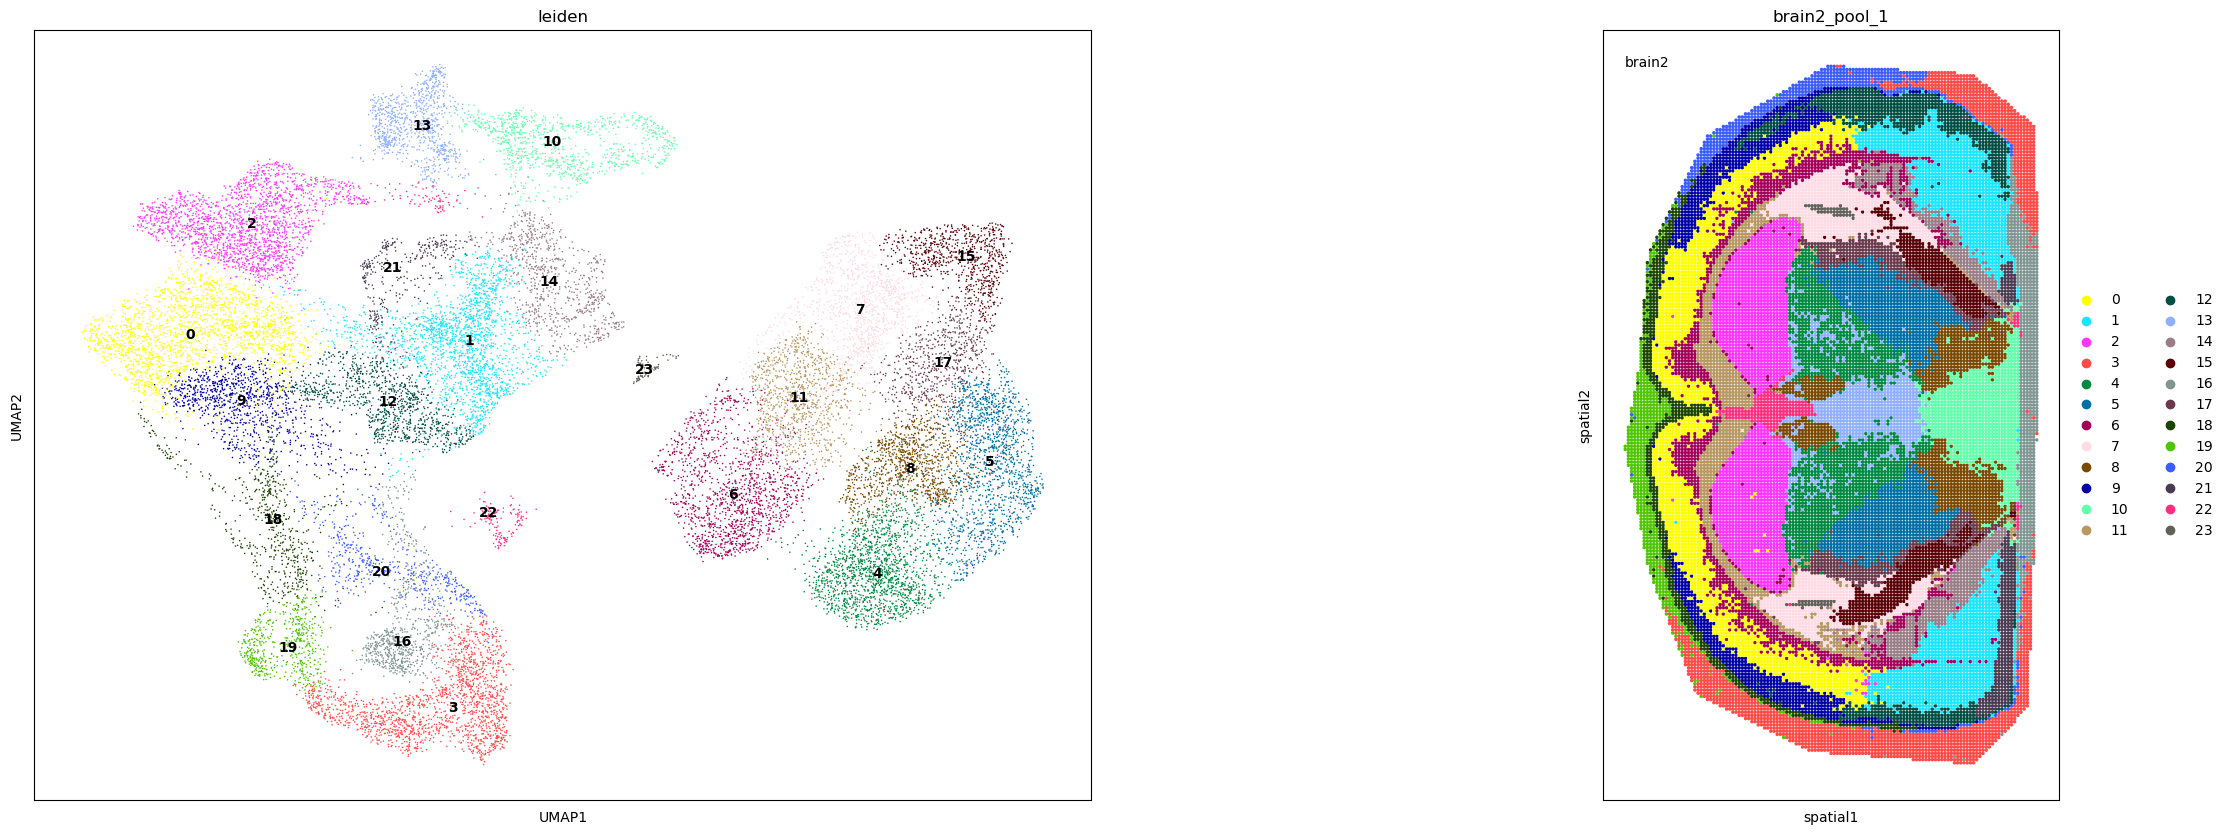

In [9]:
clusters.plot_umap_cluster(size=55, show=True)

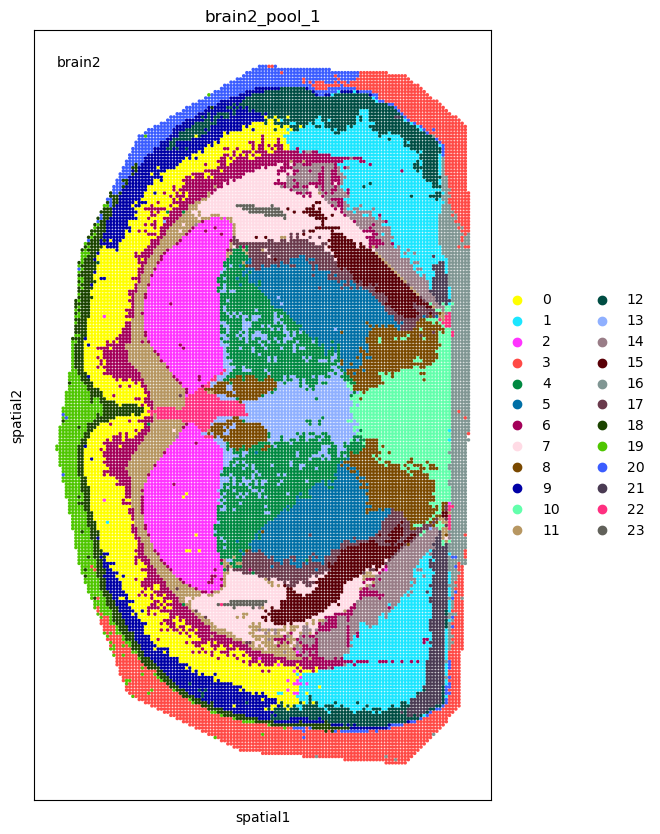

In [10]:
clusters.plot_cluster(size=55, show=True)

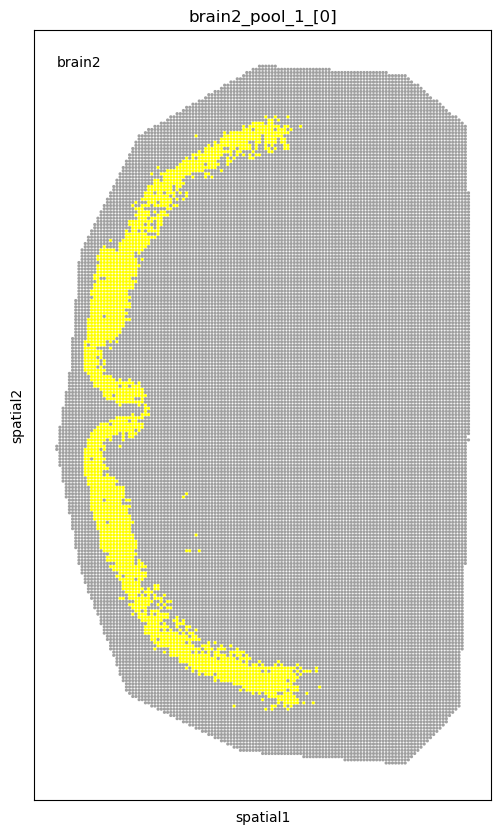

In [11]:
clusters.plot_select_cluster(0,show=True)

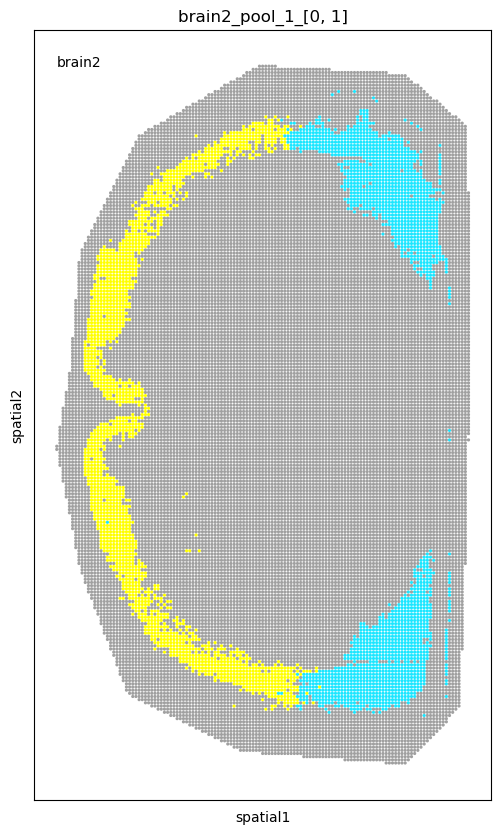

In [12]:
clusters.plot_select_cluster([0,1],show=True)

# Markers

In [13]:
adata = sc.read(os.path.join(result_path,'clustering/pool/brain2_1.h5ad'))
adata_filtered = adata_filter(adata,0.1,0.1)

In [14]:
markers = Markers(data_path,result_path,'brain2','pool')

markers.findmarkers(adata=adata_filtered,adj_pval_cutoff=0.05,top=50)

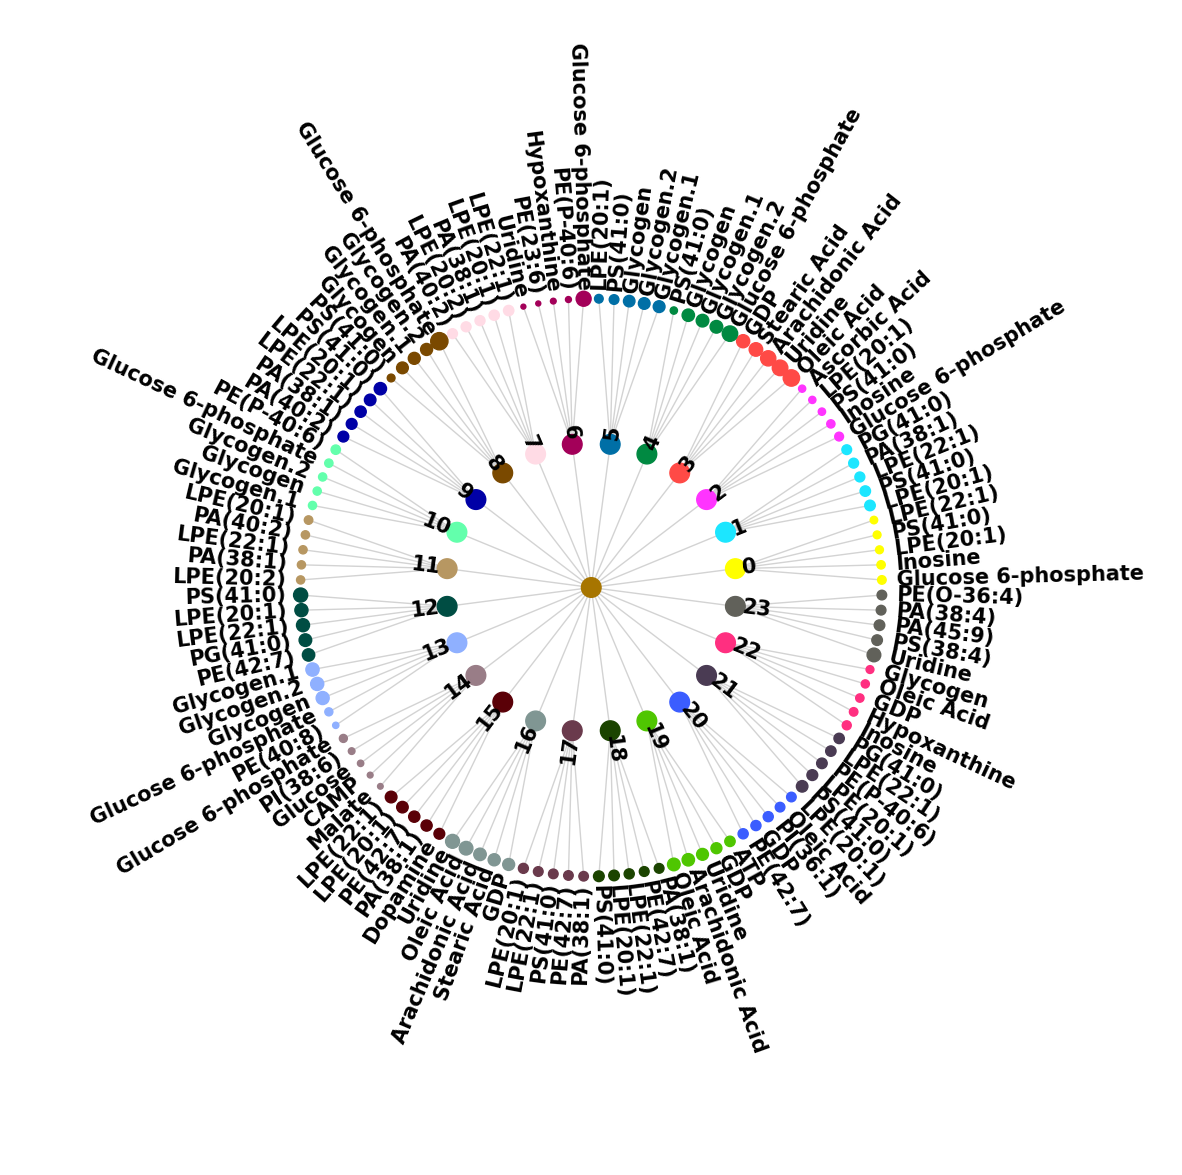

In [15]:
markers.circular_tree(top=5, show=True)

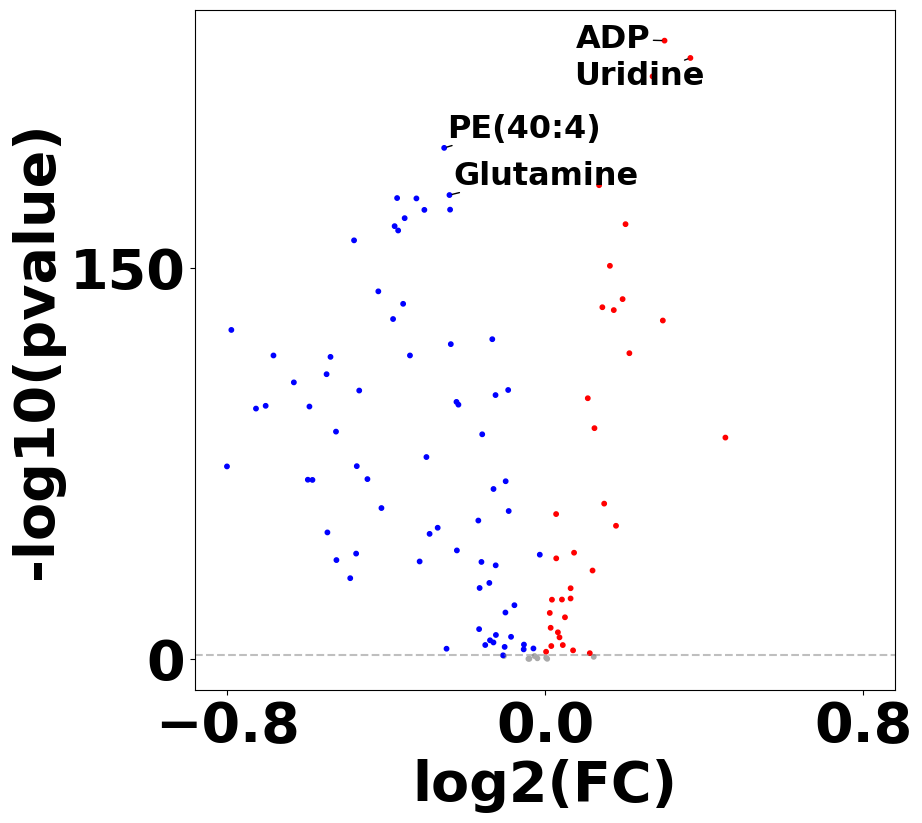

In [16]:
markers.volcano_plot(0, show=True)

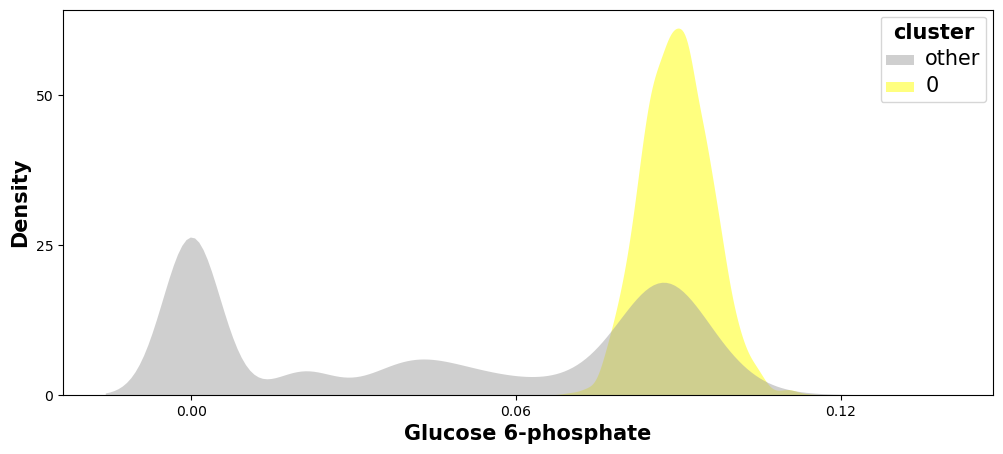

In [17]:
markers.density_plot(adata_filtered,0,'Glucose 6-phosphate',show=True)

# Pathway

In [18]:
pathway = Pathway(data_path, result_path, 'brain2','metabolomics')

pathway.findpathway()

R[write to console]: Loading required package: qs

R[write to console]: qs 0.25.5



Metabolomics and Glycomics are combined for pathway enrichment analysis.
cluster: 0 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 1 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 2 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 3 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
clu

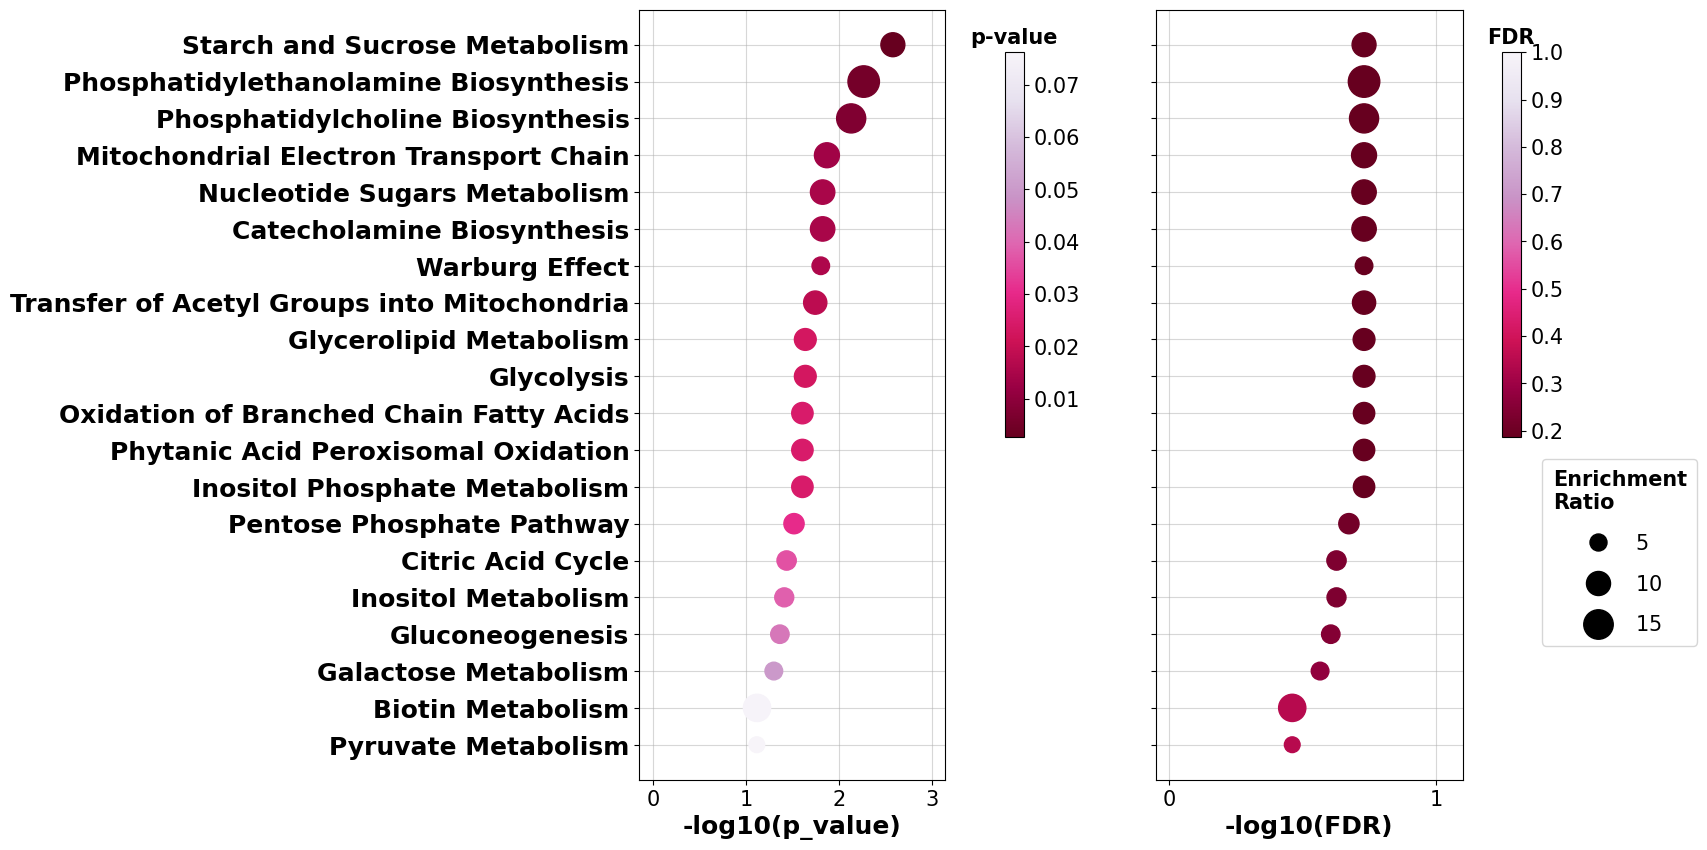

In [19]:
pathway.plot_dot(cluster=1,scale=30,height=10,top=20,show=True)

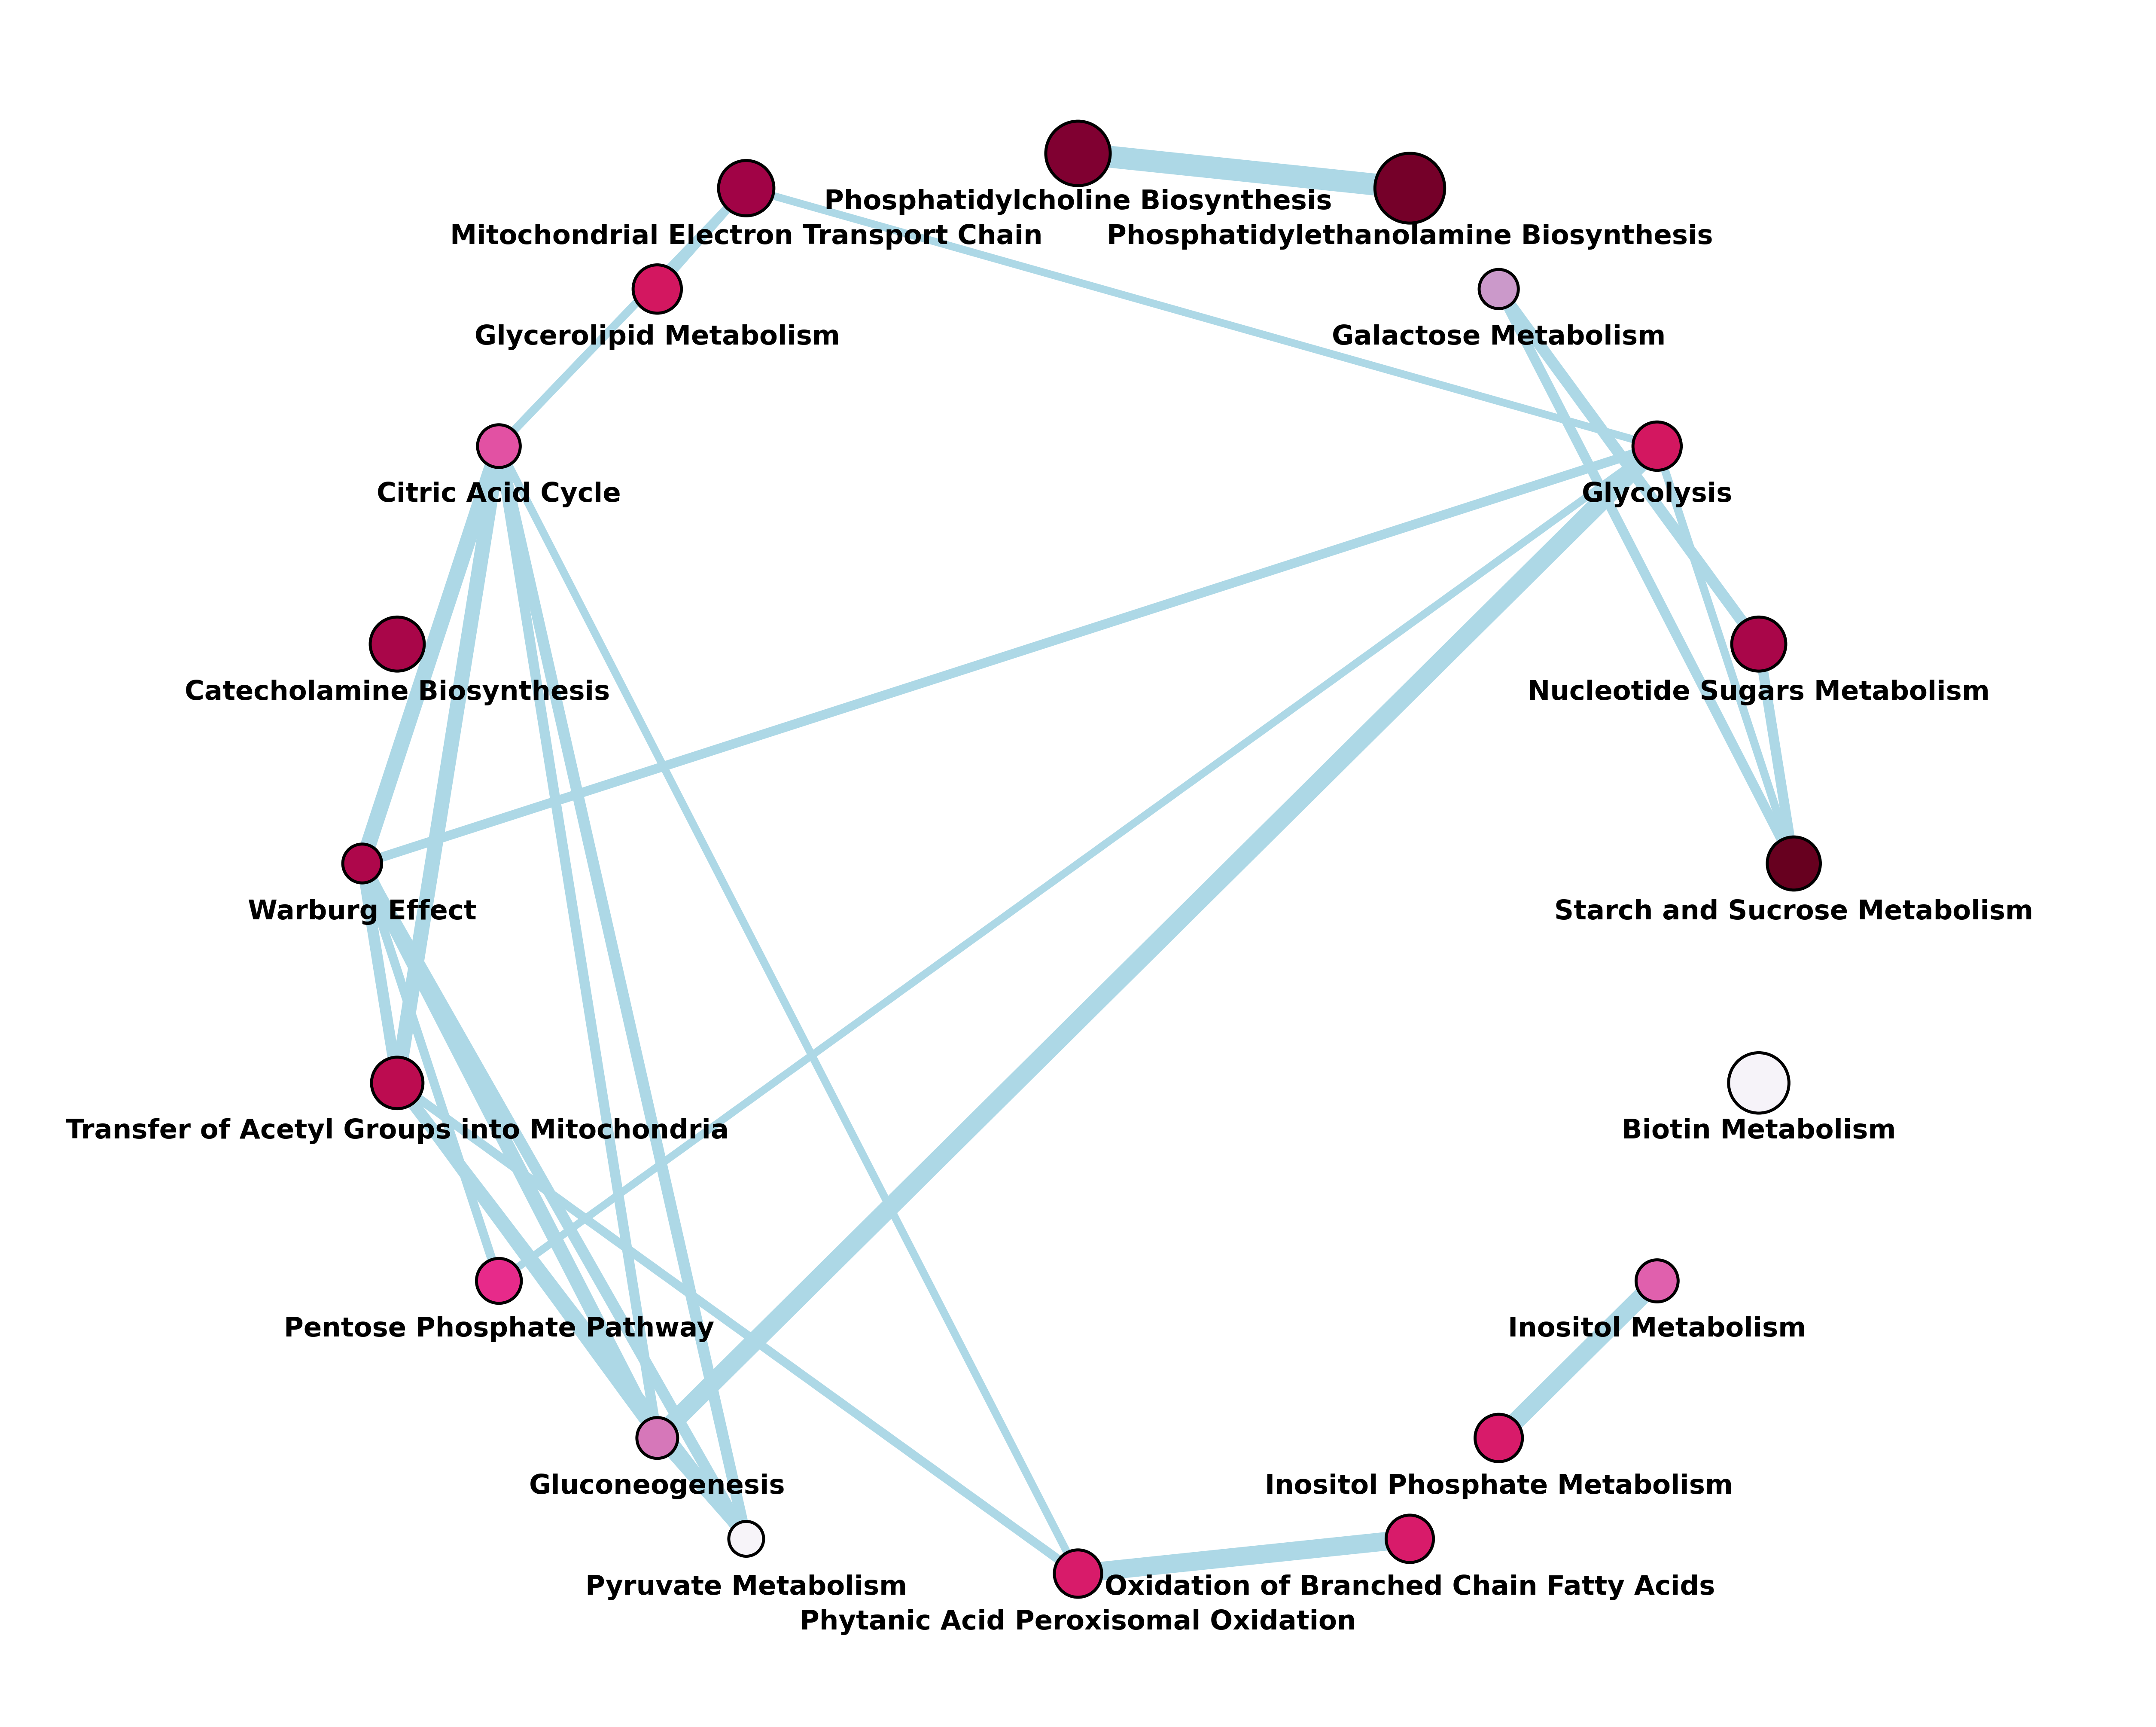

In [20]:
pathway.pathway_network(cluster=1,top=20,show=True)

In [21]:
pathway = Pathway(data_path, result_path, 'brain2','lipidomics')
pathway.findpathway()

cluster: 0 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 1 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 2 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 3 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
cluster: 4 ;
[1] "MetaboAnalyst R objects initialized ..."
[1] "1"          

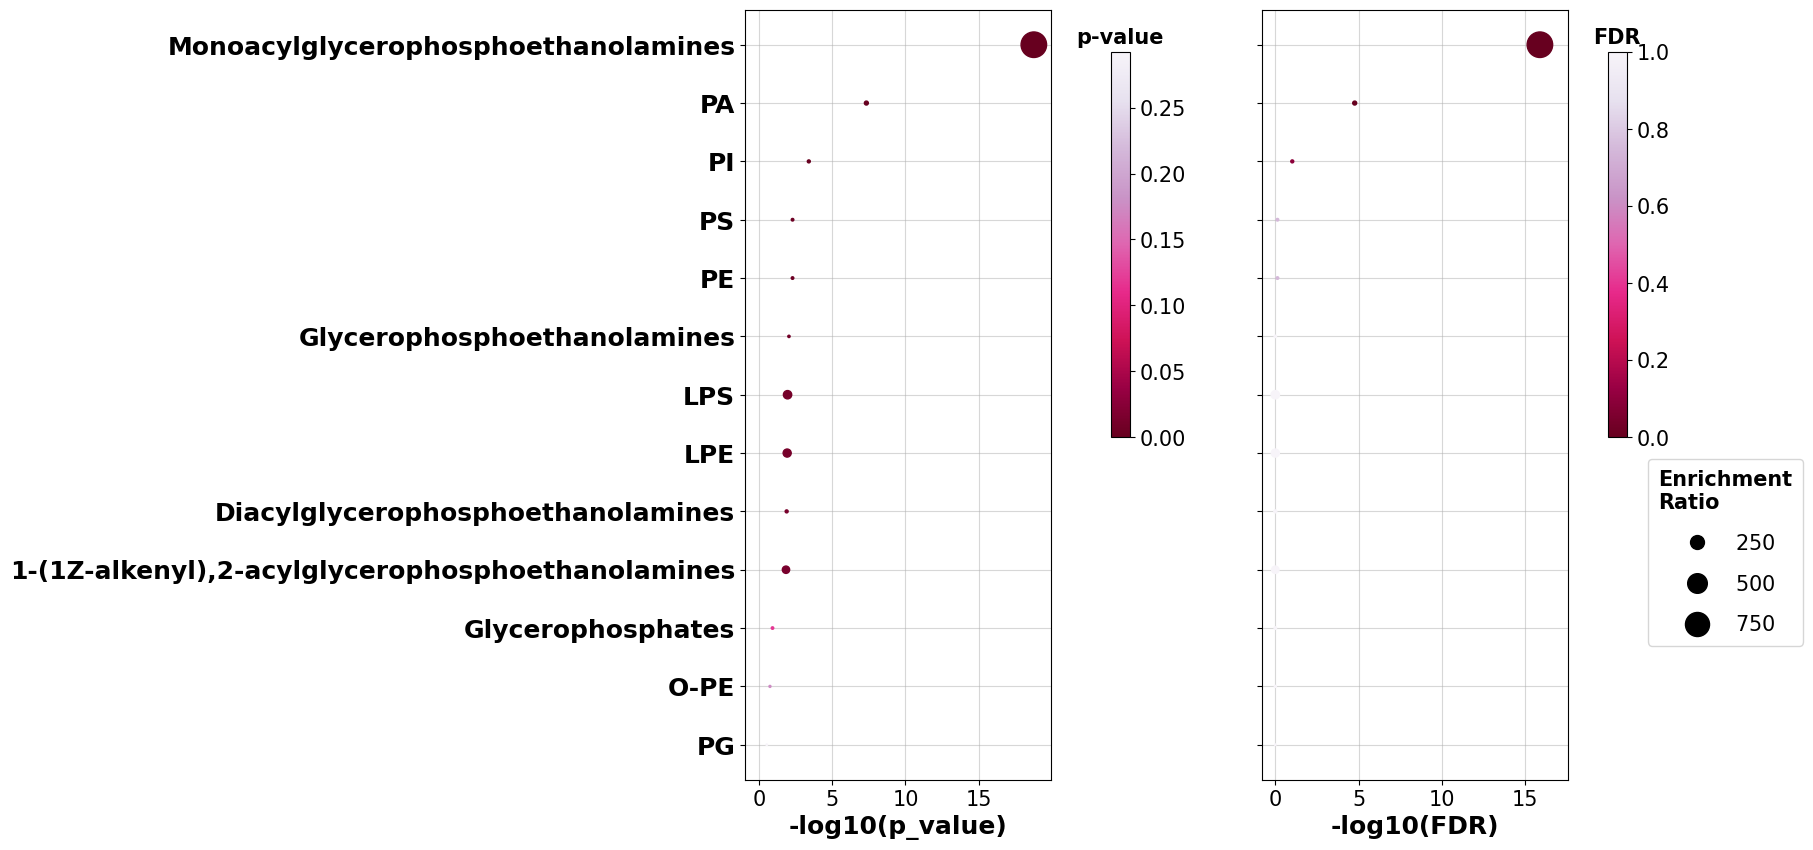

In [22]:
pathway.plot_dot(cluster=1,scale=0.4,height=10,top=20,show=True)